# **Experiments 4: Tuning hyperparamaters for decision tree model**



## The steps are:
1.   Load and explore dataset
2.   Data preparation
3.   Split data
4.   Train Decision tree with default hyperparamaters
5.   Reduce Overfitting with min_sample_split
6.   Reduce Further Overfitting with max_depth
7.  Assess model on Testing Set

## 1. Load and explore dataset

**[1.1]** Import packages

In [ ]:
import pandas as pd
import numpy as np

**[1.2]** Create a variable called file_url containing the CSV file and load the dataset into dataframe called df

In [ ]:
file_url = 'repurchase_training.csv'
df = pd.read_csv(file_url)

**[1.3]** Display the first 5 rows of df


In [ ]:
df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


**[1.4]** Display the dimensions of df

In [ ]:
df.shape

(131337, 17)

**[1.5]** Display the summary of df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

Columns with missing data: **age_band and gender**

**[1.6]** Display the descriptive statictics of df


In [ ]:
df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


There is no significant outliers in dataset.

## 2. Data Preparation

**[2.1]** Create a copy of the dataframe and remove duplicated rows

In [ ]:
df_cleaned = df.copy()
df_cleaned.drop_duplicates(inplace=True)

In [ ]:
print(df_cleaned['car_model'].unique())

['model_1' 'model_2' 'model_3' 'model_5' 'model_6' 'model_4' 'model_7'
 'model_8' 'model_9' 'model_10' 'model_11' 'model_13' 'model_12'
 'model_14' 'model_15' 'model_16' 'model_17' 'model_18' 'model_19']


In [ ]:
print(df_cleaned['car_segment'].unique())

['LCV' 'Small/Medium' 'Large/SUV' 'Other']


**[2.2]** Looking at all records that are the same with model 19 except car segment.

In [ ]:
a=df_cleaned[df_cleaned['car_model']=='model_19']
b=a.drop('car_model', axis=1)
merged_df = pd.merge(df_cleaned, b, on=['Target', 'age_band', 'gender', 'age_of_vehicle_years',
       'sched_serv_warr', 'non_sched_serv_warr', 'sched_serv_paid',
       'non_sched_serv_paid', 'total_paid_services', 'total_services',
       'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased'])
merged_df

,ID_x,Target,age_band,gender,car_model,car_segment_x,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,ID_y,car_segment_y
0,3529,0,NaN,Male,model_3,Large/SUV,9,1,1,1,3,2,1,1,1,1,1,100546,Other
1,81547,0,NaN,Male,model_5,Large/SUV,9,1,1,1,3,2,1,1,1,1,1,100546,Other
2,100546,0,NaN,Male,model_19,Other,9,1,1,1,3,2,1,1,1,1,1,100546,Other
3,30920,0,NaN,Male,model_19,Other,9,1,1,3,1,2,1,1,1,1,1,30920,Other
4,68275,0,NaN,Male,model_5,Large/SUV,9,1,1,3,1,2,1,1,1,1,1,30920,Other
5,92955,0,NaN,Male,model_1,LCV,9,1,1,3,1,2,1,1,1,1,1,30920,Other


Not only one model could match model 19, so it better to remove data with model 19

**[2.3]** Remove model_19

In [ ]:
df_cleaned=df_cleaned[df_cleaned['car_model']!='model_19']

**[2.4]** Drop non-numeric columns

In [ ]:
df_cleaned.drop(['age_band','gender','car_model','car_segment','ID'], axis=1,inplace=True)

<ipython-input-14-11e271c8384a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['age_band','gender','car_model','car_segment','ID'], axis=1,inplace=True)


**[2.5]** Remove all observation with missing values:

In [ ]:
df_cleaned.dropna(how='any', inplace=True)

<ipython-input-15-8769c4db0ffb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(how='any', inplace=True)


## 3. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df_cleaned.pop('Target')
X = df_cleaned
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

In [ ]:
f1_score(y_train, y_base)

0.0

## 4. Train a Decision Tree with Default Hyperparameters

**[4.1]** Import DecisionTreeClassifier from sklearn.tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**[4.2]** Instantiate a DecisionTreeClassifier() model.

In [ ]:
tree_1 = DecisionTreeClassifier(random_state=42)

**[4.3]** Train the model on the training set and save the predictions from the training and validation sets



In [ ]:
tree_1.fit(X_train, y_train)
y_train_preds = tree_1.predict(X_train)
y_val_preds = tree_1.predict(X_val)

**[4.5]** Print the f1 score of the training and validation sets

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

0.9997781229199023
0.7875555555555556


## 5.  Reduce Overfitting with min_samples_split

**[5.1]** Train a DecisionTree model with min_samples_split=15

In [ ]:
tree_2 = DecisionTreeClassifier(random_state=42, min_samples_split=15)
tree_2.fit(X_train, y_train)
y_train_preds = tree_2.predict(X_train)
y_val_preds = tree_2.predict(X_val)

**[5.2]**Print the f1 score of the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

0.8863423760523854
0.8172248803827752


**[5.3]** Train a DecisionTree model with min_samples_split=45

In [ ]:
tree_3 = DecisionTreeClassifier(random_state=42, min_samples_split=45)
tree_3.fit(X_train, y_train)
y_train_preds = tree_3.predict(X_train)
y_val_preds = tree_3.predict(X_val)

**[5.4]**Print the f1 score of the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

0.819872851424535
0.7892204042348412


**[5.5]** Train a DecisionTree model with min_samples_split=75

In [ ]:
tree_4 = DecisionTreeClassifier(random_state=42, min_samples_split=75)
tree_4.fit(X_train, y_train)
y_train_preds = tree_4.predict(X_train)
y_val_preds = tree_4.predict(X_val)

**[5.6]**Print the f1 score of the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds)-f1_score(y_val, y_val_preds))

0.8083411433926897
0.7961904761904761
0.012150667202213583


**[5.7]** Train a DecisionTree model with min_samples_split=85

In [ ]:
tree_5 = DecisionTreeClassifier(random_state=42, min_samples_split=85)
tree_5.fit(X_train, y_train)
y_train_preds = tree_5.predict(X_train)
y_val_preds = tree_5.predict(X_val)

**[5.8]**Print the f1 score of the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds)-f1_score(y_val, y_val_preds))

0.8018890200708382
0.77487922705314
0.027009793017698125


## 6.  Reduce Further Overfitting with max_depth

**[6.1]** Train a DecisionTree model with max_depth=3

In [ ]:
tree_depth_1 = DecisionTreeClassifier(random_state=42, min_samples_split=75, max_depth=3)
tree_depth_1.fit(X_train, y_train)
y_train_preds = tree_depth_1.predict(X_train)
y_val_preds = tree_depth_1.predict(X_val)

**[6.2]**Print the f1 score of the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds)-f1_score(y_val, y_val_preds))

0.43464952555861647
0.4306930693069307
0.00395645625168578


**[6.3]** Train a DecisionTree model with max_depth=8

In [ ]:
tree_depth_2 = DecisionTreeClassifier(random_state=42, min_samples_split=75, max_depth=8)
tree_depth_2.fit(X_train, y_train)
y_train_preds = tree_depth_2.predict(X_train)
y_val_preds = tree_depth_2.predict(X_val)

**[6.4]**Print the f1 score of the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds)-f1_score(y_val, y_val_preds))

0.709522539343825
0.7039827771797632
0.005539762164061823


**[6.5]** Train a DecisionTree model with max_depth=13

In [ ]:
tree_depth_3 = DecisionTreeClassifier(random_state=42, min_samples_split=75, max_depth=13)
tree_depth_3.fit(X_train, y_train)
y_train_preds = tree_depth_3.predict(X_train)
y_val_preds = tree_depth_3.predict(X_val)

**[6.6]**Print the f1 score of the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds)-f1_score(y_val, y_val_preds))

0.8075029308323564
0.7961904761904761
0.011312454641880243


**[6.7]** Train a DecisionTree model with max_depth=18

In [ ]:
tree_depth_4 = DecisionTreeClassifier(random_state=42, min_samples_split=75, max_depth=18)
tree_depth_4.fit(X_train, y_train)
y_train_preds = tree_depth_4.predict(X_train)
y_val_preds = tree_depth_4.predict(X_val)

**[6.8]**Print the f1 score of the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds)-f1_score(y_val, y_val_preds))

0.8083411433926897
0.7961904761904761
0.012150667202213583


## 7. Assess model on Testing Set

**[7]** Print the F1 scores of our best model on the testing set

In [ ]:
y_test_preds = tree_depth_3.predict(X_test)
print(f1_score(y_test, y_test_preds))

0.8006042296072508


**[7]** Display the confusion matrix for our best model on all sets

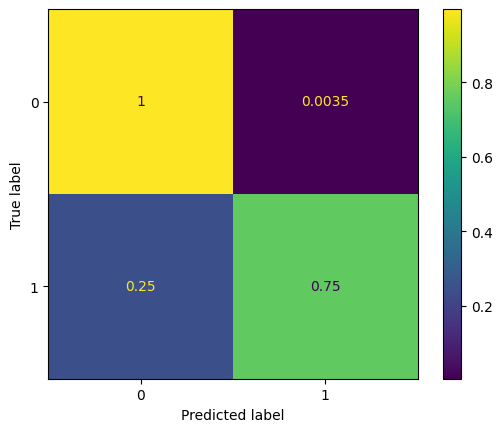

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(tree_depth_3, X_test, y_test, normalize='true')